Week 8: Curve Fitting

You may use the example scripts in the class repository as a starting point for the exercises below.
 When doing the fits, you can use the lmfit package as in lmfit-demo.py or you may use the pollsf function from Garcia in the nm4p package.
  Note that pollsf has not been de-bugged.

Problem 1

In some problems we know on physical grounds that the curve must intercept the origin.
Write a function that fits a data set to the equation

$$Y(x;a,a_0,a_1) = a_0\,x + a_1\,x^2$$

Name     Value      Min      Max   Stderr     Vary     Expr Brute_Step
a0    0.4964     -inf      inf  0.01548     True     None     None
a1         2     -inf      inf 0.001025     True     None     None
[[Model]]
    Model(deg2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 20
    # variables        = 2
    chi-square         = 0.66341467
    reduced chi-square = 0.03685637
    Akaike info crit   = -64.1217464
    Bayesian info crit = -62.1302818
    R-squared          = 0.99999937
[[Variables]]
    a0:  0.49639844 +/- 0.01547695 (3.12%) (init = 1)
    a1:  2.00025283 +/- 0.00102544 (0.05%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a0, a1) = -0.9684


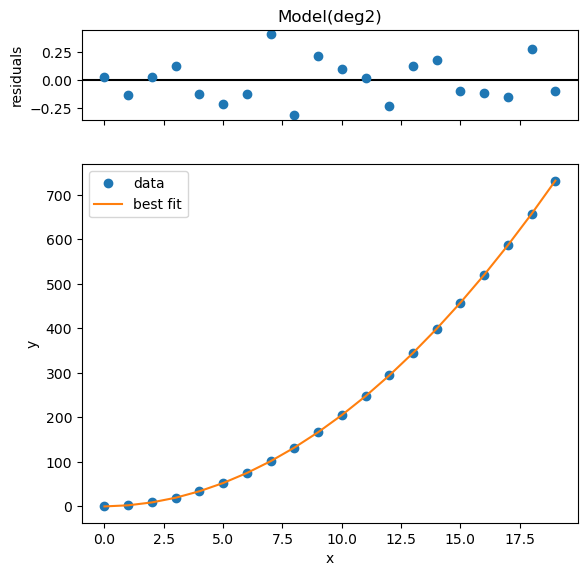

In [72]:
from lmfit import Model, Parameters
import numpy as np
import matplotlib.pylab as plt

def deg2(x,a0,a1):
    """
    Helper function that evaluates The polynomial of interest in Problem 1
    given the parameters a0, a1, and x, it returns the evaluated polynomial
    a  0*x + a1*x^2
    """
    return a0*x+a1*x*x

## create dataset
a0=.5
a1=2

c = np.array([0,a0,a1])
N = 20  # Number of data points
x = np.arange(N)  # x = [0, 1, 2, ... N-1]
y = np.empty(N)
alpha = 0.2
sigma = alpha * np.ones(N)  # Constant error bar
randomState = np.random.RandomState()  # Initialize random state

params_dict = {}
for el in c:
    params_dict.update({'C{0:g}': el})

for i in range(N):
    r = alpha * randomState.normal()  # Generate a Gaussian distributed random vector of length N, mean 0 variance alpha
    temp = 0.0
    for m in range(len(c)):
        temp += c[m] * x[i] ** m
    y[i] = temp + r  # Generate data

# begin fitting
def try_fitting(x,y,c,graph=1):
    """
    Params:
    x- x values for curve to fit
    y- y values for curve to fit
    c - initial fit parameters as an array [a0 a1]
    graph - boolean controlling whether to spawn graph and print fitting params to output
    returns:
    result - the fitting results
    """

    model = Model(deg2, independent_vars=['x'])
    result = model.fit(y, x=x, a0=c[0], a1=c[1])
    #starting the model params as the real params feels like cheating, but it's what the example did.
    # Still, I tried some different parameters and even when the starting values are wildly different from the true values, it only seems to need 7 function evals
    if graph:
        result.params.pretty_print()
        print(result.fit_report())
        result.plot()
        plt.show()
    return result

dummy_var= try_fitting(x,y,[1,1]) # dummy_var avoids printing result to cell output

Problem 2

Use this equation to fit the trajectories obtained from balle.py for the initial condition $y_0 = 0$ from Section 2.1.
Try a variety of values for the initial velocity (at least 3) and keep the initial angle equal to 45 degrees.
For each initial velocity, fit the curve for the case with and without air resistance.
You should include at least 1 case where air resistance is significant.

initial speed: 10 m/s
Name     Value      Min      Max   Stderr     Vary     Expr Brute_Step
a0     1.069     -inf      inf 1.263e-16     True     None     None
a1   -0.0981     -inf      inf 1.399e-17     True     None     None
[[Model]]
    Model(deg2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 17
    # variables        = 2
    chi-square         = 1.1130e-29
    reduced chi-square = 7.4202e-31
    Akaike info crit   = -1177.51856
    Bayesian info crit = -1175.85214
    R-squared          = 1.00000000
[[Variables]]
    a0:  1.06936718 +/- 1.2628e-16 (0.00%) (init = 50)
    a1: -0.09810000 +/- 1.3988e-17 (0.00%) (init = -5)
[[Correlations]] (unreported correlations are < 0.100)
    C(a0, a1) = -0.9684


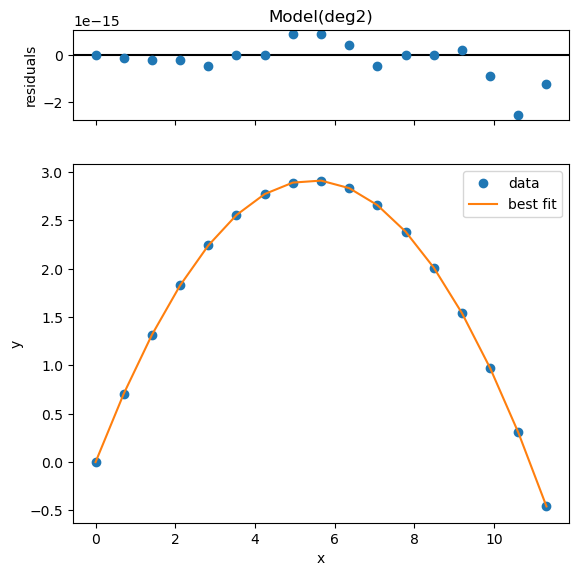

initial speed: 150 m/s
Name     Value      Min      Max   Stderr     Vary     Expr Brute_Step
a0     1.005     -inf      inf 5.735e-17     True     None     None
a1  -0.000436     -inf      inf 3.195e-20     True     None     None
[[Model]]
    Model(deg2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10
    # data points      = 219
    # variables        = 2
    chi-square         = 1.7449e-23
    reduced chi-square = 8.0412e-26
    Akaike info crit   = -12652.4060
    Bayesian info crit = -12645.6279
    R-squared          = 1.00000000
[[Variables]]
    a0:  1.00462448 +/- 5.7350e-17 (0.00%) (init = 50)
    a1: -4.3600e-04 +/- 3.1947e-20 (0.00%) (init = -5)
[[Correlations]] (unreported correlations are < 0.100)
    C(a0, a1) = -0.9682


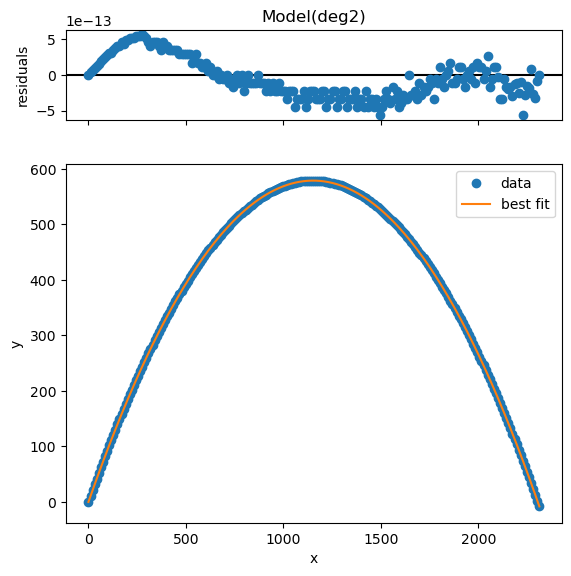

initial speed: 300 m/s
Name     Value      Min      Max   Stderr     Vary     Expr Brute_Step
a0     1.002     -inf      inf 3.906e-17     True     None     None
a1  -0.000109     -inf      inf 5.471e-21     True     None     None
[[Model]]
    Model(deg2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10
    # data points      = 435
    # variables        = 2
    chi-square         = 5.0806e-22
    reduced chi-square = 1.1733e-24
    Akaike info crit   = -23967.4529
    Bayesian info crit = -23959.3022
    R-squared          = 1.00000000
[[Variables]]
    a0:  1.00231224 +/- 3.9061e-17 (0.00%) (init = 50)
    a1: -1.0900e-04 +/- 5.4711e-21 (0.00%) (init = -5)
[[Correlations]] (unreported correlations are < 0.100)
    C(a0, a1) = -0.9682


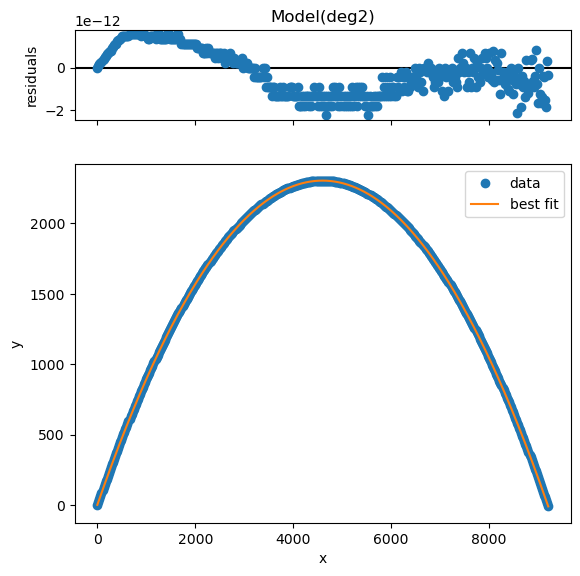

initial speed: 10 m/s; air resistance
Name     Value      Min      Max   Stderr     Vary     Expr Brute_Step
a0     1.094     -inf      inf 0.002675     True     None     None
a1   -0.1054     -inf      inf 0.000307     True     None     None
[[Model]]
    Model(deg2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 17
    # variables        = 2
    chi-square         = 0.00462494
    reduced chi-square = 3.0833e-04
    Akaike info crit   = -135.561591
    Bayesian info crit = -133.895164
    R-squared          = 0.99976098
[[Variables]]
    a0:  1.09386153 +/- 0.00267498 (0.24%) (init = 50)
    a1: -0.10535488 +/- 3.0697e-04 (0.29%) (init = -5)
[[Correlations]] (unreported correlations are < 0.100)
    C(a0, a1) = -0.9690


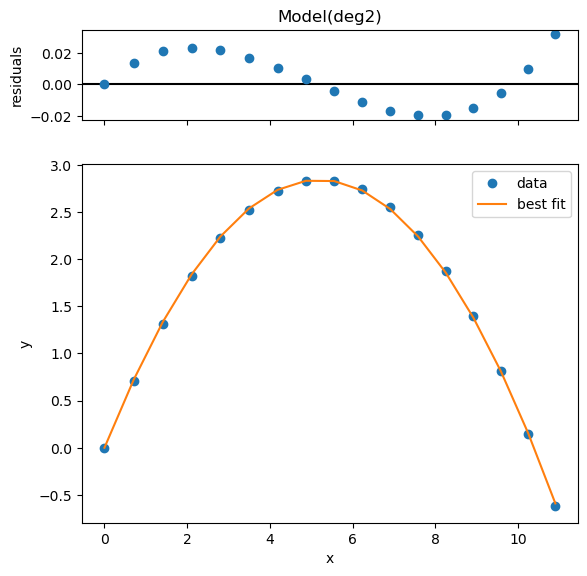

initial speed: 150 m/s; air resistance
Name     Value      Min      Max   Stderr     Vary     Expr Brute_Step
a0     1.681     -inf      inf  0.03952     True     None     None
a1  -0.005618     -inf      inf 0.0001686     True     None     None
[[Model]]
    Model(deg2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 101
    # variables        = 2
    chi-square         = 22777.8228
    reduced chi-square = 230.079018
    Akaike info crit   = 551.260636
    Bayesian info crit = 556.490877
    R-squared          = 0.85462013
[[Variables]]
    a0:  1.68059730 +/- 0.03952096 (2.35%) (init = 50)
    a1: -0.00561789 +/- 1.6864e-04 (3.00%) (init = -5)
[[Correlations]] (unreported correlations are < 0.100)
    C(a0, a1) = -0.9819


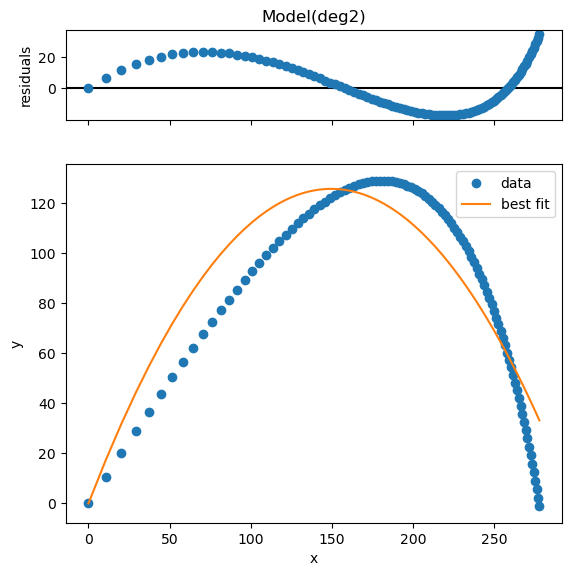

initial speed: 300 m/s; air resistance
Name     Value      Min      Max   Stderr     Vary     Expr Brute_Step
a0     1.922     -inf      inf  0.05391     True     None     None
a1  -0.004799     -inf      inf 0.0001704     True     None     None
[[Model]]
    Model(deg2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 124
    # variables        = 2
    chi-square         = 101186.753
    reduced chi-square = 829.399615
    Akaike info crit   = 835.350754
    Bayesian info crit = 840.991317
    R-squared          = 0.77479569
[[Variables]]
    a0:  1.92226145 +/- 0.05391321 (2.80%) (init = 50)
    a1: -0.00479915 +/- 1.7036e-04 (3.55%) (init = -5)
[[Correlations]] (unreported correlations are < 0.100)
    C(a0, a1) = -0.9855


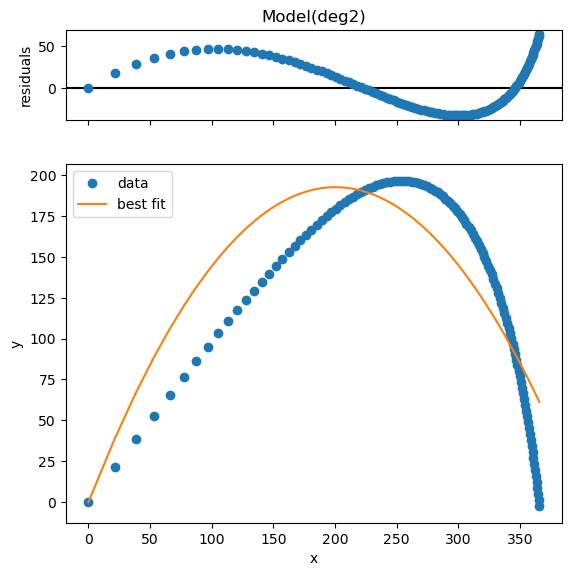

In [73]:
import numpy as np
import matplotlib.pyplot as plt
def func_balle(y0,speed,theta,airFlag,tau=0.1,plots=0):
    """A functionalized version of balle
    Params:
    y0 - initial height in meters
    speed - initial ball speed (m/s)
    theta - init angle in degrees
    airFlag - boolean whether to apply air resistance
    tau - Timestep in seconds
    plots - boolean for whether to produce plots
    Returns:
    xplot - x values for the simulated trajectory
    yplot - y values for the simulated trajectory


    """
    # Set initial position and velocity of the baseball
    r0 = np.array([0., y0])  # Initial vector position
    v0 = np.array([speed * np.cos(theta*np.pi/180), speed * np.sin(theta*np.pi/180)])  # initial velocity
    r = np.copy(r0)  # Set initial position
    v = np.copy(v0)  # Set initial velocity

    # Set physical parameters (mass, Cd, etc.)
    Cd = 0.35  # Drag coefficient (dimensionless)
    area = 4.3e-3  # Cross-sectional area of projectile (m^2)
    mass = 0.145   # Mass of projectile (kg)
    grav = 9.81    # Gravitational acceleration (m/s^2)

    # Set air resistance flag
    if airFlag == 0:
        rho = 0.       # No air resistance
        air_text = '(no air)'
    else:
        rho = 1.2     # Density of air (kg/m^3)
        air_text = '(with air)'
    air_const = -0.5*Cd*rho*area/mass   # Air resistance constant

    # * Loop until ball hits ground or max steps completed
    #tau = eval(input('Enter timestep dt in seconds: '))  # (sec)
    maxstep = 5000
    laststep = maxstep

    # Set up arrays for data
    xplot = np.empty(maxstep)
    yplot = np.empty(maxstep)

    x_noAir = np.empty(maxstep)
    y_noAir = np.empty(maxstep)

    for istep in range(maxstep):
        t = istep * tau  # Current time

        # Record computed position for plotting
        xplot[istep] = r[0]
        yplot[istep] = r[1]

        x_noAir[istep] = r0[0] + v0[0]*t
        y_noAir[istep] = r0[1] + v0[1]*t - 0.5*grav*t**2

        # Calculate the acceleration of the ball
        accel = air_const * np.linalg.norm(v) * v  # Air resistance
        accel[1] = accel[1] - grav # update y acceleration to include gravity

        # Calculate the new position and velocity using Euler's method.
        r = r + tau * v  # Euler step
        v = v + tau * accel

        # If the ball reaches the ground (i.e. y < 0), break out of the loop
        if r[1] < 0:
            laststep = istep + 1
            xplot[laststep] = r[0]  # Record last values completed
            yplot[laststep] = r[1]

            # x_noAir[laststep] = r0[0] + v0[0] * t
            # y_noAir[laststep] = r0[1] + v0[1] * t - 0.5 * grav * t ** 2
            break  # Break out of the for loop

    # Print maximum range and time of flight
    if plots:
        print('Maximum range is {0:.2f} meters'.format(r[0]))
        print('Time of flight is {0:.1f} seconds'.format(laststep * tau))

    #trim trailing zeros, but only zeros there due to unsimulated timesteps
    xplot= xplot[0:laststep+1]
    yplot= yplot[0:laststep+1]
    # Graph the trajectory of the baseball
    if plots:
        fig, ax = plt.subplots()
        ax.set_title('Projectile Motion: ' + air_text)
        ax.plot(x_noAir[:laststep], y_noAir[:laststep], '-', c='C2', label='Theory (no air)')
        ax.plot(xplot[:laststep+1], yplot[:laststep+1], '+', label='Euler method')
        # Mark the location of the ground by a straight line
        ax.plot(np.array([0.0, x_noAir[laststep-1]]), np.array([0.0, 0.0]), '-', color='k')
        ax.legend(frameon=False)
        ax.set_xlabel('Range (m)')
        ax.set_ylabel('Height (m)')

        plt.show()



    return xplot,yplot

def fit_balle(speed,airFlag,graphing=1):
    """
    function to fit a balle trajectory
    params:
    speed - The intial speed for the 45 degree trajectory beginning at 0,0
    airFlag - whether to apply air resistance to the balle simulations
    graphing - boolean of whether to create graph
    Returns:
    result - results of fitting hte balle trajectory
    """
    x,y=func_balle(0,speed,45,airFlag,plots=0)
    results = try_fitting(x,y,[50,-5],graph=graphing)

    return results


print(f'initial speed: 10 m/s')
fit_balle(10,0)

print(f'initial speed: 150 m/s')
fit_balle(150,0)

print(f'initial speed: 300 m/s')
fit_balle(300,0)

print(f'initial speed: 10 m/s; air resistance')

fit_balle(10,1)
print(f'initial speed: 150 m/s; air resistance')


fit_balle(150,1)
print(f'initial speed: 300 m/s; air resistance')
placeholder=fit_balle(300,1)# placeholder avoids printing result to cell output

Looks pretty good until high speed air resistance cases. In those, the air resistance slows the ball significantly, deviating it from the parabolic trajectory.

Challenge Question:
What is the largest velocity for which a parabola accurately fits the data?
How do you know when your fit becomes inaccurate?

We can try fitting different cases until the $R^2$ goes below some value. Let's try 0.98

Name     Value      Min      Max   Stderr     Vary     Expr Brute_Step
a0     1.219     -inf      inf  0.01354     True     None     None
a1  -0.01272     -inf      inf 0.0001798     True     None     None
[[Model]]
    Model(deg2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 50
    # variables        = 2
    chi-square         = 80.5804848
    reduced chi-square = 1.67876010
    Akaike info crit   = 27.8616745
    Bayesian info crit = 31.6857205
    R-squared          = 0.98123244
[[Variables]]
    a0:  1.21931195 +/- 0.01353838 (1.11%) (init = 50)
    a1: -0.01271822 +/- 1.7980e-04 (1.41%) (init = -5)
[[Correlations]] (unreported correlations are < 0.100)
    C(a0, a1) = -0.9732


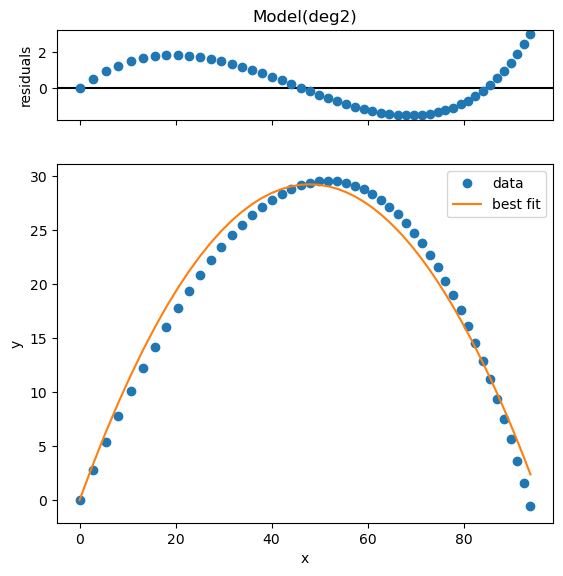

Max speed for even a half-decent fit is 39 m/s


In [74]:
for testSpeed in range(1,500):
    res= fit_balle(testSpeed,1,graphing=0)
    if res.rsquared < 0.98:
        maxSpeed=testSpeed-1
        break


dummy_var=fit_balle(maxSpeed,1,graphing=1)# dummy var to capture model output and avoid more output spam

print(f'Max speed for even a half-decent fit is {maxSpeed} m/s')

I tried 0.95 and it was a bad fit. R^2 is probably not the best statistic to use here, but it's easy to do programatically.
Probably, the better thing to measure for how bad a fit is - is a clear pattern in the residuals.